In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
def read_dataframe(path):
    df = pd.read_parquet(path)
    
    df["duration"] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).apply(lambda x: x.total_seconds() / 60)

    df = df[(df.duration > 1) & (df.duration < 60) ]
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df.loc[:,categorical].astype("str")
    return df
    
    

    

In [5]:
path = "..//data//green_tripdata_2023-01.parquet"
path2 = "..//data//green_tripdata_2023-02.parquet"

In [6]:
df_train = read_dataframe(path)
df_val = read_dataframe(path2)

In [7]:
len(df_train), len(df_val)

(65920, 62544)

In [9]:
df_train["PU_DO"] = df_train["PULocationID"] + "_" + df_train["DOLocationID"]
df_val["PU_DO"] = df_val["PULocationID"] + "_" + df_val["DOLocationID"]

In [13]:
# categorical = ['PULocationID', 'DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)


target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values


In [17]:

lr = LinearRegression()
# lr = Lasso()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_absolute_error(y_val, y_pred)

3.9318468480658004

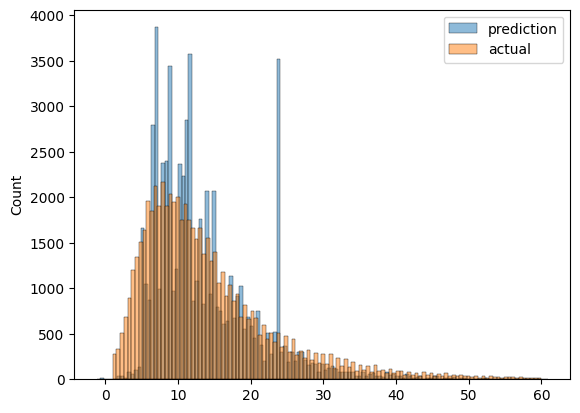

In [18]:
sns.histplot(y_pred, label="prediction", alpha=0.5)
sns.histplot(y_val, label="actual", alpha=0.5)
plt.legend()

In [20]:
with open("..//models//lin_reg.bin", "wb") as f:
    pickle.dump((dv,lr), f)